# Deep Feed Forward (DFF)

## Imports

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.metrics import accuracy_score, log_loss
import plotly.graph_objects as go
from tqdm import tqdm

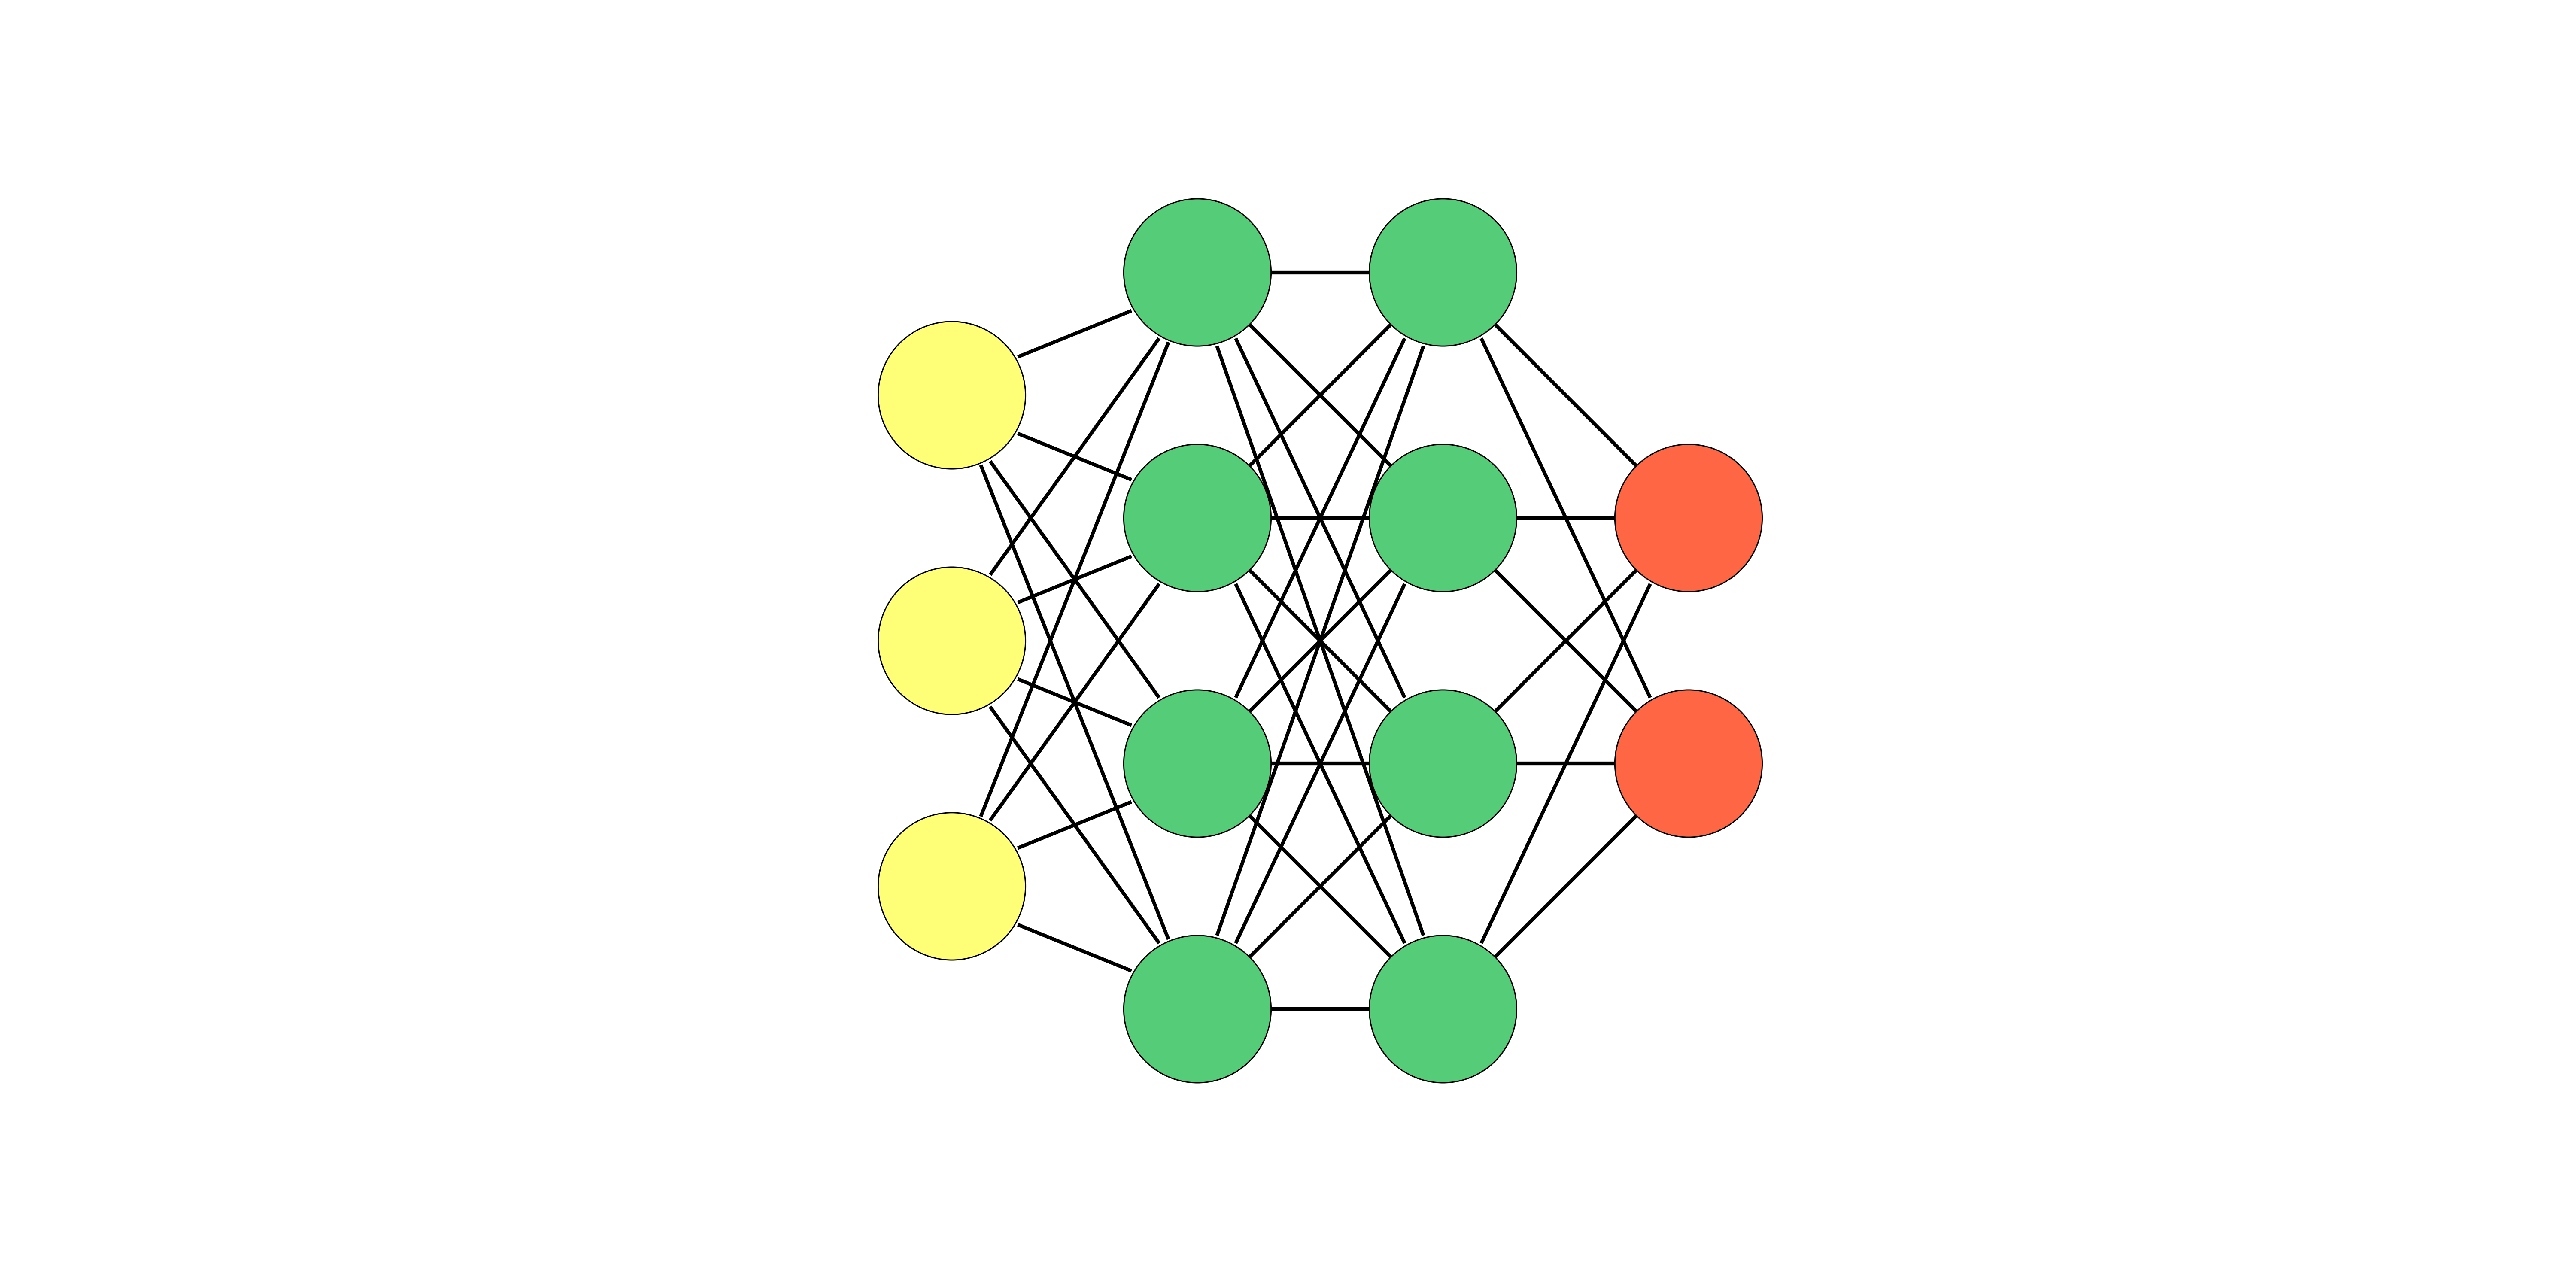

In [2]:
Image(filename='../../Viznet/DeepFeedForward.png', width = 500)

## 1. Initialisation des paramètres

Pour un réseau de neurones à deux couche nous avions 4 paramètres: $W^{[1]}, b^{[1]}$ et $W^{[2]}, b^{[2]}$
$$
\begin{equation*}
\large{
    W^{[1]} \in \mathbb{R}^{(n^{[1]} \times n^{[0]})} \\
    \\
    b^{[1]} \in \mathbb{R}^{(n^{[1]} \times 1)} \\
    \\
    W^{[2]} \in \mathbb{R}^{(n^{[2]} \times n^{[1]})} \\
    \\
    b^{[2]} \in \mathbb{R}^{(n^{[2]} \times 1)} \\
    \\
    \scriptstyle{
        n^{[0]} \text{: nombre de neurones dans la couche d'entrée} [0] \\
        \\
        n^{[1]} \text{: nombre de neurones dans la couche} [1] \\
        \\
        n^{[2]} \text{: nombre de neurones dans la couche} [2]
    }
}
\end{equation*}
$$
En observant les dimensions on peut généraliser de manière suivante:
$$
\begin{equation*}
\large{
    \color{blue}{
        W^{[c]} \in \mathbb{R}^{(n^{[c]} \times n^{[c-1]})} \\
        \\
        b^{[c]} \in \mathbb{R}^{(n^{[c]} \times 1)} \\
    }
    \\
    \scriptstyle{
        n^{[c]} \text{: nombre de neurones dans la couche courante} [c] \\
        \\
        n^{[c-1]} \text{: nombre de neurones dans la couche précendante} [c-1]
    }
}
\end{equation*}
$$


In [3]:
def initialisation(dimensions):
    parameters = {}
    C = len(dimensions)
    
    for c in range(1, C):
        # Wc est de dimension (nc * nc-1)
        parameters['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c-1])
        # bc est de dimension (nc * 1)
        parameters['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parameters

In [4]:
parameters = initialisation([2, 32, 32, 1])

for key, val in parameters.items():
    print(key, val.shape)

W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


## 2. Forward Propagation

Pour un réseau de neurones à deux couche nous avions 4 équations: $Z^{[1]}, A^{[1]}$ et $Z^{[2]}, A^{[2]}$  


$$
\begin{equation*}
\large{
    \text{Couche 1 :}\\
    \\
    Z^{[1]} = W^{[1]} \cdot X + b^{[1]} \\
    A^{[1]} = \frac{1}{1+\exp^{-z^{[1]}}} \\
    \\
    \\
    \text{Couche 2 :}\\
    \\
    Z^{[2]} = W^{[2]} \cdot A^{[1]} + b^{[2]} \\
    A^{[2]} = \frac{1}{1+\exp^{-z^{[2]}}} \\
}
\end{equation*}
$$

En observant les équations couches après couches, on peut généraliser de manière suivante:


$$
\begin{equation*}
\large{
    \scriptstyle{
        \text{On pose : } X = A^{[0]}
    } \\
    \color{blue}{
        Z^{[c]} = W^{[c]} \cdot A^{[c-1]} + b^{[c]} \\
        A^{[c]} = \frac{1}{1+\exp^{-z^{[c]}}} \\
    }
}
\end{equation*}
$$

In [5]:
def forward_propagation(X, parameters):
    activations = {'A0': X}
    C = len(parameters) // 2
    
    for c in range(1, C + 1):
        # Zc = Wc . Ac-1 + bc
        Z = parameters['W' + str(c)].dot(activations['A' + str(c - 1)]) + parameters['b' + str(c)]
        # Ac = 1/(1 - exp(-Zc))
        activations['A' + str(c)] = 1 / (1+ np.exp(-Z))

    return activations

In [6]:
X = np.random.randn(2, 100)
activations = forward_propagation(X, parameters)

for key, val in activations.items():
    print(key, val.shape)

A0 (2, 100)
A1 (32, 100)
A2 (32, 100)
A3 (1, 100)


## 3. Back-Propagation

Pour un réseau de neurones à deux couche nous avions les équations suivantes :   



$$
\begin{equation}
\large{
\begin{aligned}
    dZ^{[2]} & = A^{[2]} -y
    \\
    dW^{[2]} & = \frac{1}{m} dZ^{[2]} \cdot A^{[1]^T}
    \\
    db^{[2]} & = \frac{1}{m}\sum_{axe1} dZ^{[2]}
    \\
    \\
    \\
    dZ^{[1]} & = W^{[2]^T} \cdot dZ^{[2]} \times A^{[1]}(1-A^{[1]})
    \\
    dW^{[1]} & = \frac{1}{m} dZ^{[1]} \cdot X^T
    \\
    db^{[1]} & = \frac{1}{m}\sum_{axe1}  dZ^{[1]}
\end{aligned}
}
\end{equation}
$$


En observant les équations couches après couches, on peut généraliser de manière suivante:


$$
\begin{equation}
\large{
    \color{blue}{
        \begin{aligned}
            dZ^{[C_f]} & = A^{[C_f]} -y
            \\
            dW^{[c]} & = \frac{1}{m} dZ^{[c]} \cdot A^{[c-1]^T}
            \\
            db^{[c]} & = \frac{1}{m}\sum_{axe1} dZ^{[c]}
            \\
            dZ^{[c-1]} & = W^{[c]^T} \cdot dZ^{[c]} \times A^{[c-1]}(1-A^{[c-1]})
            \\
            \\
        \end{aligned}
    }
}
\\
\\
\\
{[C_f]} \text{: Est la couche finale} \\
\end{equation}
$$

In [7]:
def back_propagation(y, activations, parameters):
    
    m = y.shape[1]
    C = len(parameters) // 2
    
    # dZCf = ACf - y
    dZ = activations['A' + str(C)] - y
    gradients = {}
    
    for c in reversed(range(1, C + 1)):
        # dWc = 1/m * dZ . Ac-1T
        gradients['dW' + str(c)] = 1 / m * np.dot(dZ, activations['A' + str(c - 1)].T)
        # dbc = 1/m * sum[axis1] dZc
        gradients['db' + str(c)] = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            # dZc-1 = WcT . dZc * Ac-1(1- Ac-1)
            dZ = np.dot(parameters['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

    return gradients

In [8]:
y = np.random.randn(1, 100)
gradients = back_propagation(y, activations, parameters)

for key, val in gradients.items():
    print(key, val.shape)

dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)


## 4. Mise à jour des paramètres

Pour un réseau de neurones à deux couche nous avions les équations suivantes :   



$$
\begin{equation}
\large{
\begin{aligned}
    W^{[2]} & = W^{[2]} - \alpha \times dW^{[2]}
    \\
    b^{[2]} & = b^{[2]} - \alpha \times db^{[2]}
    \\
    W^{[1]} & = W^{[1]} - \alpha \times dW^{[1]}
    \\
    b^{[1]} & = b^{[1]} - \alpha \times db^{[1]}
\end{aligned}
}
\end{equation}
$$



En observant les équations, on peut généraliser de manière suivante:


$$
\begin{equation}
\large{
    \color{blue}{
        \begin{aligned}
            W^{[c]} & = W^{[c]} - \alpha \times dW^{[c]}
            \\
            b^{[c]} & = b^{[c]} - \alpha \times db^{[c]}
        \end{aligned}
    }
}
\end{equation}
$$

In [9]:
def update(gradients, parameters, learning_rate):
    C = len(parameters) // 2
    
    for c in range(1, C + 1):
        parameters['W' + str(c)] = parameters['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parameters['b' + str(c)] = parameters['b' + str(c)] - learning_rate * gradients['db' + str(c)]
    
    return parameters

In [10]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    return Af >= 0.5

In [11]:
def visualisation(X, y, parameters, ax, pos):
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
    np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = predict(x_in.T, parameters)
    y_pred = np.round(y_pred).reshape(xx.shape)
    
    
    ax[pos].contourf(xx, yy, y_pred, cmap='copper', alpha=0.25 )
    ax[pos].scatter(X[0, :], X[1, :], c=y, s=40, cmap='copper')
    ax[pos].set_xlim(xx.min(), xx.max())
    ax[pos].set_ylim(yy.min(), yy.max())
    
    
    ax[pos].set_title('Frontière de Décision')
    ax[pos].set_axisbelow(True)
    ax[pos].minorticks_on()
    ax[pos].grid(True,'major', alpha=0.2, ls='-')
    ax[pos].grid(True,'minor', alpha=0.2, ls='-')

In [12]:
def neural_network(X, y, hidden_layers = (32, 32, 32), learning_rate = 0.1, n_iter = 1000):
    
    np.random.seed(0)
    # initialisation W, b
    dimensions = list(hidden_layers) # dim of hidden_layers
    dimensions.insert(0, X.shape[0]) # dim of inputs
    dimensions.append(y.shape[0]) # dim of outputs
    parameters = initialisation(dimensions)
    
    train_loss = []
    train_acc = []
    
    # Boucle d'apprentissage
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parameters)
        gradients = back_propagation(y, activations, parameters)
        parameters = update(gradients, parameters, learning_rate)
        
        if i % 10 == 0:
            C = len(parameters) // 2
            train_loss.append(log_loss(y, activations['A' + str(C)]))
            y_pred = predict(X, parameters)
            current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
    
    # Visualisation
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

    ax[0].plot(train_loss, label='Train loss')
    ax[0].set_title('Fonction de Coût')
    ax[0].legend()
    
    ax[1].plot(train_acc, label='Train acc')
    ax[1].set_title(f"Performance : {train_acc[-1]}")
    ax[1].legend()
    
    visualisation(X, y, parameters, ax, 2)
    plt.show()
    
    return parameters

In [13]:
def generate_X_y(dataset):
    X, y = dataset
    X = X.T
    y = y.reshape((1, y.shape[0]))

    print('Dimensions de X:', X.shape)
    print('Dimensions de y:', y.shape)

    plt.scatter(X[0, :], X[1, :], c=y, cmap='copper')
    plt.show()
    return (X, y)

Dimensions de X: (2, 1000)
Dimensions de y: (1, 1000)


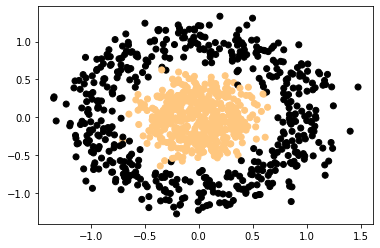

In [14]:
X, y = generate_X_y(make_circles(n_samples=1000, noise=0.15, factor=0.3, random_state=0))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 697.66it/s]


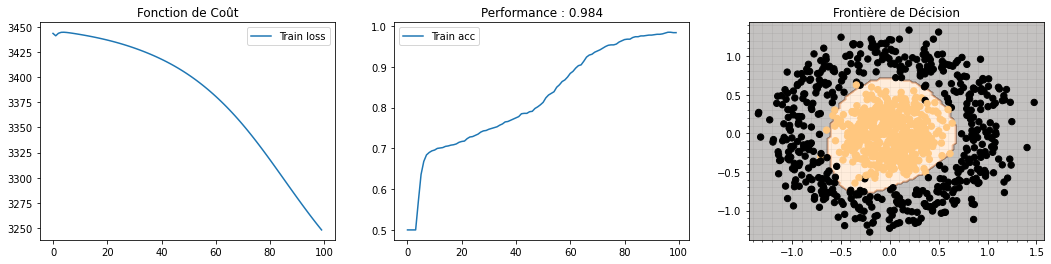

In [15]:
parameters = neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 1000)

Dimensions de X: (2, 1000)
Dimensions de y: (1, 1000)


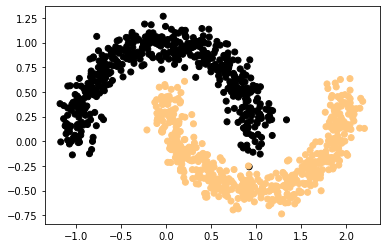

In [16]:
X, y = generate_X_y(make_moons(n_samples=1000, noise=0.1, random_state=0))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 278.47it/s]


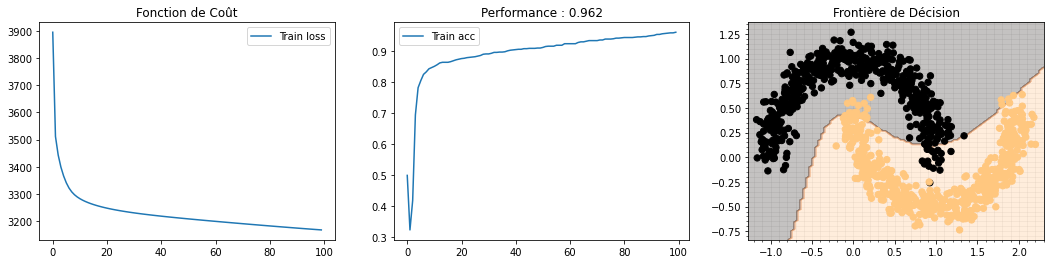

In [17]:
parameters = neural_network(X, y, hidden_layers = (32, 32, 32), learning_rate = 0.1, n_iter = 1000)